# Deep Feed Forward Neural Network

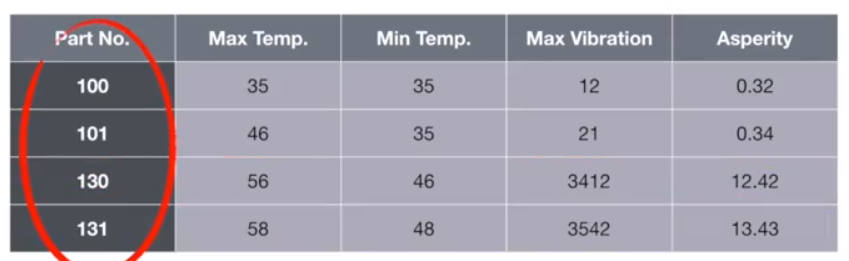

Assume the above mentioned production data.

In [3]:
dp1 = {"partno":100,"max_temp":35,"min_temp":35,"maxvibration":12,"asperity":0.32}
dp2= {"partno":101,"max_temp":46,"min_temp":35,"maxvibration":21,"asperity":0.32}
dp3= {"partno":130,"max_temp":56,"min_temp":46,"maxvibration":3412,"asperity":12.42}
dp4= {"partno":131,"max_temp":58,"min_temp":48,"maxvibration":3542,"asperity":13.43}


Predicting asperity based on the sensor data. It can be noticed that max vibartion data has the highest impct on the output.

In [4]:
# to predict asperity based on sensor values
def predict(dp):
    if dp["maxvibration"] > 100:
        return 13
    else:
        return 0.33
        

In [5]:
predict(dp1)

0.33

### Linear Regression


Let us see if we can predict without hardcoding the values. This can be done using Linear Regression. It creates a linear combination between our input fields and some parameters w. 
IF THIS is plotted  w1 IS THE OFFSET OF THE LINE. It can be given as:

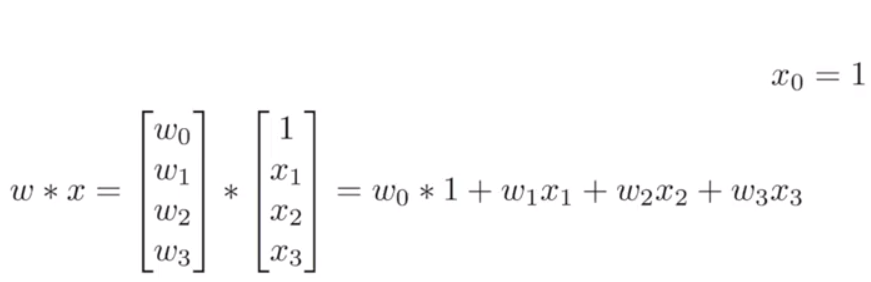


In [6]:
w1=0.30
w2 =0
w3=0
w4 =13/3412.0
def mlpredict(dp):
    return w1+w2*dp['max_temp']+w3*dp["min_temp"]+w4*dp["maxvibration"]
    

In [7]:
mlpredict(dp1)

0.3457209847596717

#### Changing the regression dataset to a binary classification dataset.


In [8]:
dp1 = {"partno":100,"max_temp":35,"min_temp":35,"maxvibration":12,"broken":0}
dp2= {"partno":101,"max_temp":46,"min_temp":35,"maxvibration":21,"broken":0}
dp3= {"partno":130,"max_temp":56,"min_temp":46,"maxvibration":3412,"broken":1}
dp4= {"partno":131,"max_temp":58,"min_temp":48,"maxvibration":3542,"broken":1}

In [9]:
def predict(dp):
    if dp["maxvibration"] > 100:
        return 1
    else:
        return 0

In [10]:
predict(dp1)

0

### Logistic Regression
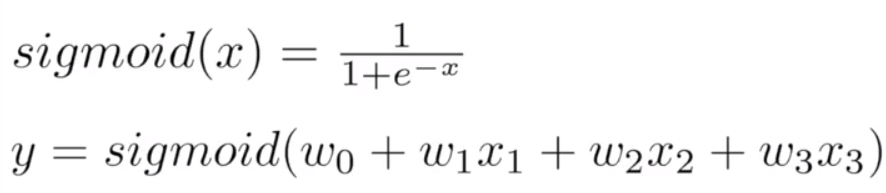

__changing linear regression model to logistic regression model by adding sigmoid function__


In [11]:
import math
import numpy as np
 
def sigmoid(x):
    return 1/1+math.exp(-x)

In [12]:
def mlpredict(dp):
    return 1 if sigmoid(w1+w2*dp['max_temp']+w3*dp["min_temp"]+w4*dp["maxvibration"]) >0.7 else 0

In [13]:
predict(dp1)

0

In [14]:
predict(dp2)


0

In [15]:
predict(dp3)

1

In [16]:
predict(dp4)

1

Python dictionaries are of course not the best way to do data science. 
Let's convert our data points to a matrix. 


In [17]:
dp1 = {"partno":100,"max_temp":35,"min_temp":35,"maxvibration":12,"asperity":0.32}
dp2= {"partno":101,"max_temp":46,"min_temp":35,"maxvibration":21,"asperity":0.32}
dp3= {"partno":130,"max_temp":56,"min_temp":46,"maxvibration":3412,"asperity":12.42}
dp4= {"partno":131,"max_temp":58,"min_temp":48,"maxvibration":3542,"asperity":13.43}

In [18]:
x1 = np.array([1]+[v for k,v in dp1.items()] [1:-1])
x2 = np.array([1]+[v for k,v in dp2.items()] [1:-1])
x3 = np.array([1]+[v for k,v in dp3.items()] [1:-1])
x4 = np.array([1]+[v for k,v in dp4.items()] [1:-1])

In [19]:
x4

array([   1,   58,   48, 3542])

### Perceptron

In [20]:
w_layer =np.random.rand(4) 

def neuron(x):
    return sigmoid(x.dot(w_layer))

In [21]:
neuron(x1)

1.0

In [22]:
def sigmoid(x):
    return 1/1+np.exp(-x)

In [23]:
w_layer1 =np.random.rand(4,4) 

def layer1(x):
    return sigmoid(x.dot(w_layer1))

In [24]:
x = np.array([x1,x2,x3,x4])

In [25]:
x

array([[   1,   35,   35,   12],
       [   1,   46,   35,   21],
       [   1,   56,   46, 3412],
       [   1,   58,   48, 3542]])

In [26]:
layer1(x)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [27]:
w_layer2 =np.random.rand(4,4) 

def layer2(x):
    return sigmoid(x.dot(w_layer2))

 This is now an __untrained feedforward neural network__.  It is a single hidden layer on the network is capable of representing any mathematical function. This is known as the _universal function approximation theory_.


In [28]:
layer2(layer1(x))

array([[1.16817607, 1.06833066, 1.13869646, 1.03883211],
       [1.16817607, 1.06833066, 1.13869646, 1.03883211],
       [1.16817607, 1.06833066, 1.13869646, 1.03883211],
       [1.16817607, 1.06833066, 1.13869646, 1.03883211]])

The predicted values are incorrect because we're using __randomly initialized weight matrices__.
__why are multiple hidden layer or other topologies used?__ 
This is because of *training*. 
Even if you can represent any mathematical function, you might not be able to train it. Because training means *selecting good values for the weight matrices*, and this is not an easy task.  